In [14]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
# Load datasets (update file paths if needed)
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [16]:
# Merge datasets for customer transaction analysis
merged = transactions.merge(customers, on='CustomerID')

In [17]:
# Feature engineering: Aggregating transaction history by customer
customer_features = merged.groupby('CustomerID').agg({
    'TotalValue': 'sum',  # Total spend
    'Quantity': 'sum',   # Total quantity bought
    'TransactionID': 'count'  # Total number of transactions
}).reset_index()

customer_features.columns = ["CustomerID", "TotalSpend", "TotalQuantity", "TransactionCount"]


In [18]:
# Normalize the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_features.iloc[:, 1:])

In [20]:
# Determine the optimal number of clusters using the Davies-Bouldin Index (DBI)
dbi_scores = []
cluster_range = range(2, 11)  # Number of clusters between 2 and 10

In [21]:
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(scaled_features)
    dbi = davies_bouldin_score(scaled_features, labels)
    dbi_scores.append(dbi)

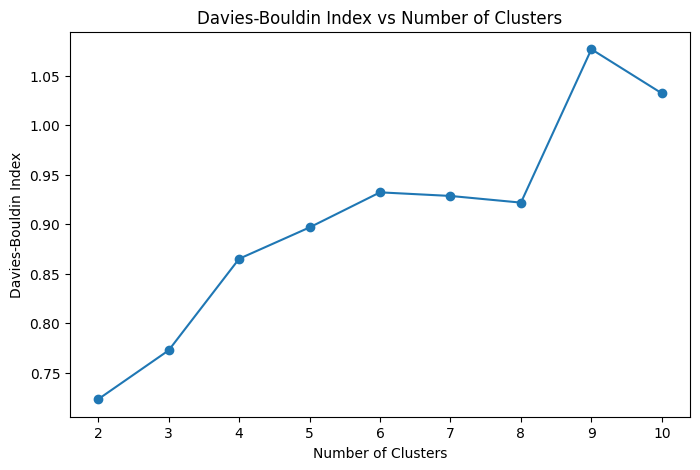

In [22]:
# Plot the DBI scores
plt.figure(figsize=(8, 5))
plt.plot(cluster_range, dbi_scores, marker='o')
plt.title('Davies-Bouldin Index vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.show()

In [23]:
# Select the optimal number of clusters (e.g., the one with the lowest DBI)
optimal_k = cluster_range[dbi_scores.index(min(dbi_scores))]
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 2


In [24]:
# Perform clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(scaled_features)

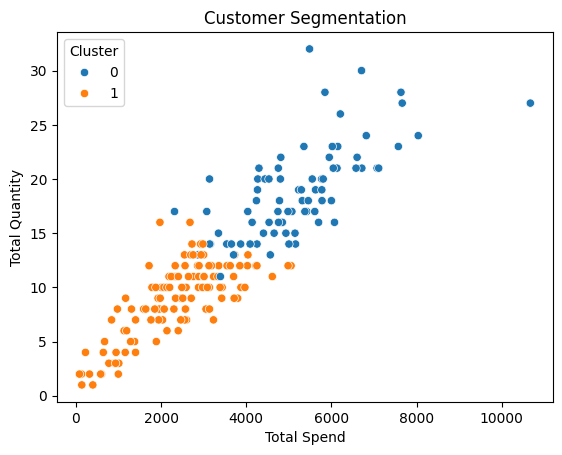

In [25]:
# Visualize the clusters using Total Spend and Total Quantity
sns.scatterplot(data=customer_features, x='TotalSpend', y='TotalQuantity', hue='Cluster', palette='tab10')
plt.title('Customer Segmentation')
plt.xlabel('Total Spend')
plt.ylabel('Total Quantity')
plt.legend(title='Cluster')
plt.show()

In [26]:
# Calculate and print final clustering metrics
final_dbi = davies_bouldin_score(scaled_features, customer_features['Cluster'])
print(f"Final Davies-Bouldin Index: {final_dbi}")

Final Davies-Bouldin Index: 0.7233652695141874


In [27]:
# Save clustering results to a CSV file
customer_features.to_csv('Customer_Segmentation.csv', index=False)
print("Clustering completed. Results saved to Customer_Segmentation.csv.")

Clustering completed. Results saved to Customer_Segmentation.csv.
